# Name: Parth Kothari
# Roll number: msc2303121012
# course: MSc

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

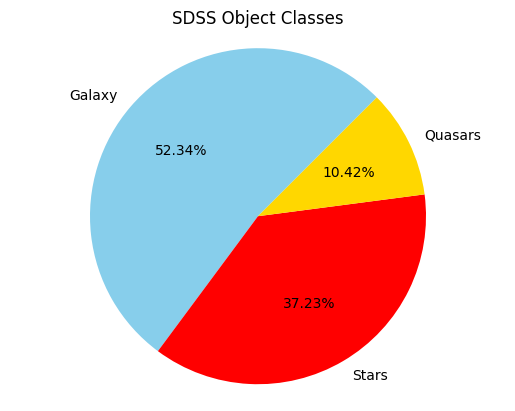

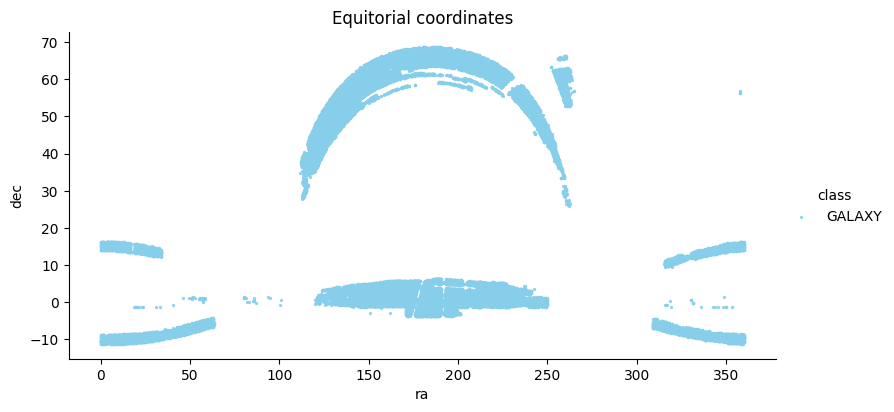

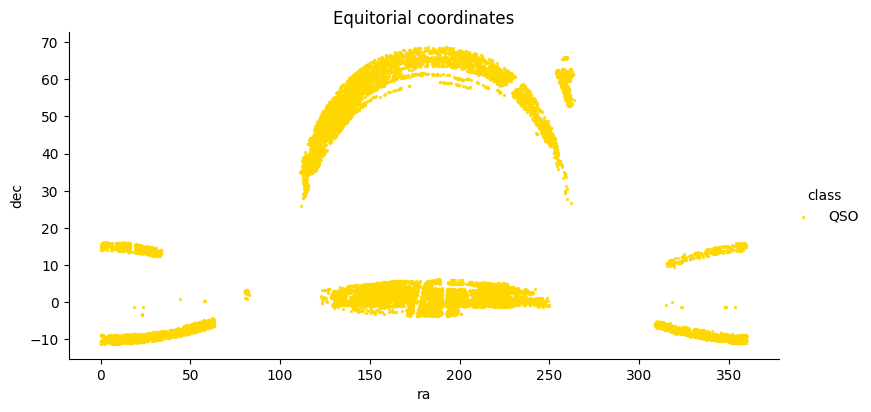

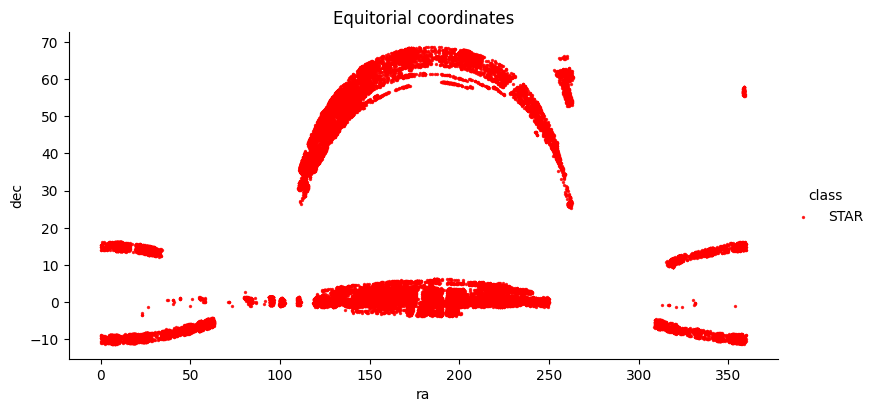

C:\Users\HP\AppData\Local\Temp\ipykernel_1412\3765108165.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(sdss_df.loc[sdss_df['class']==label, feature],


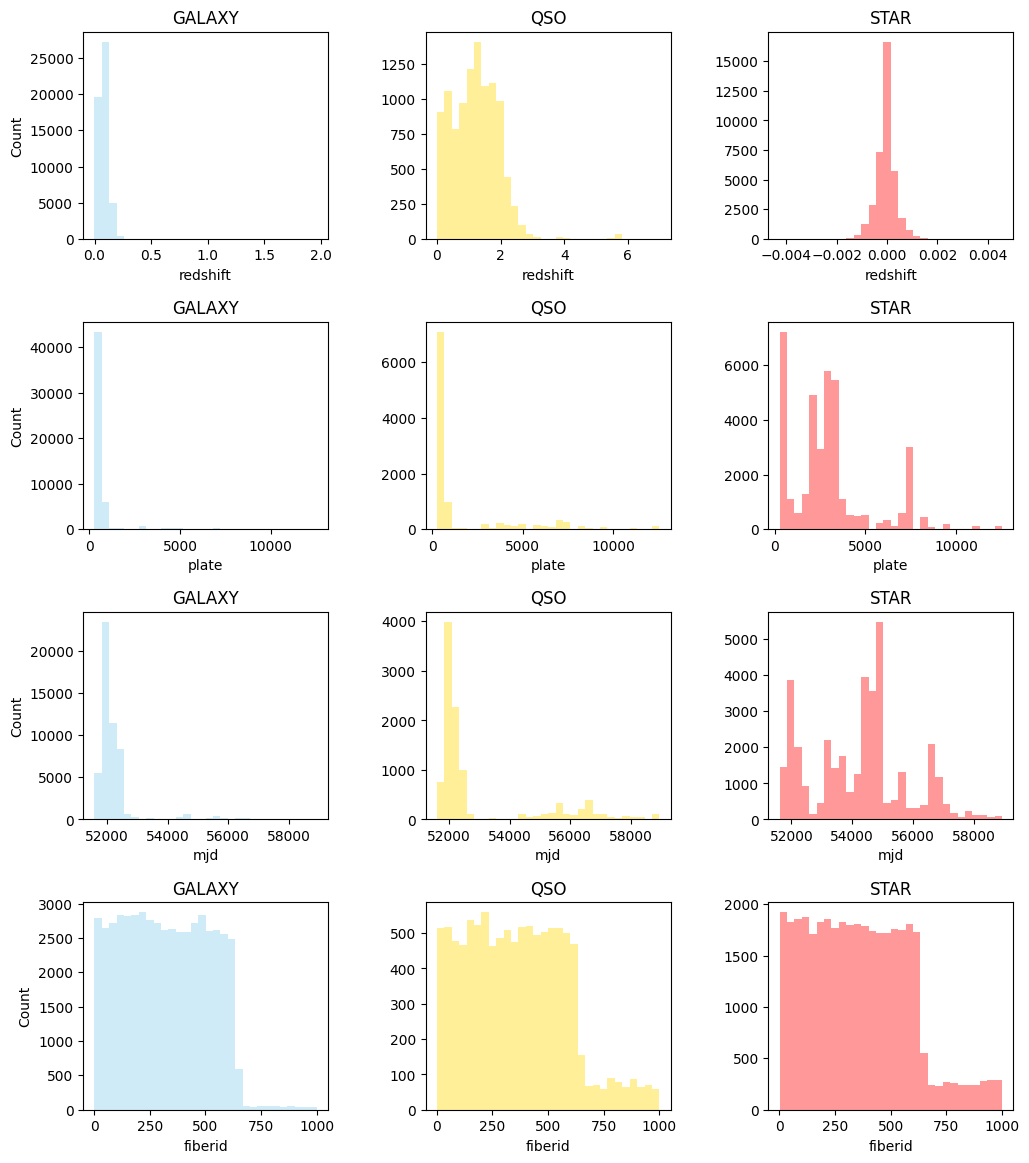

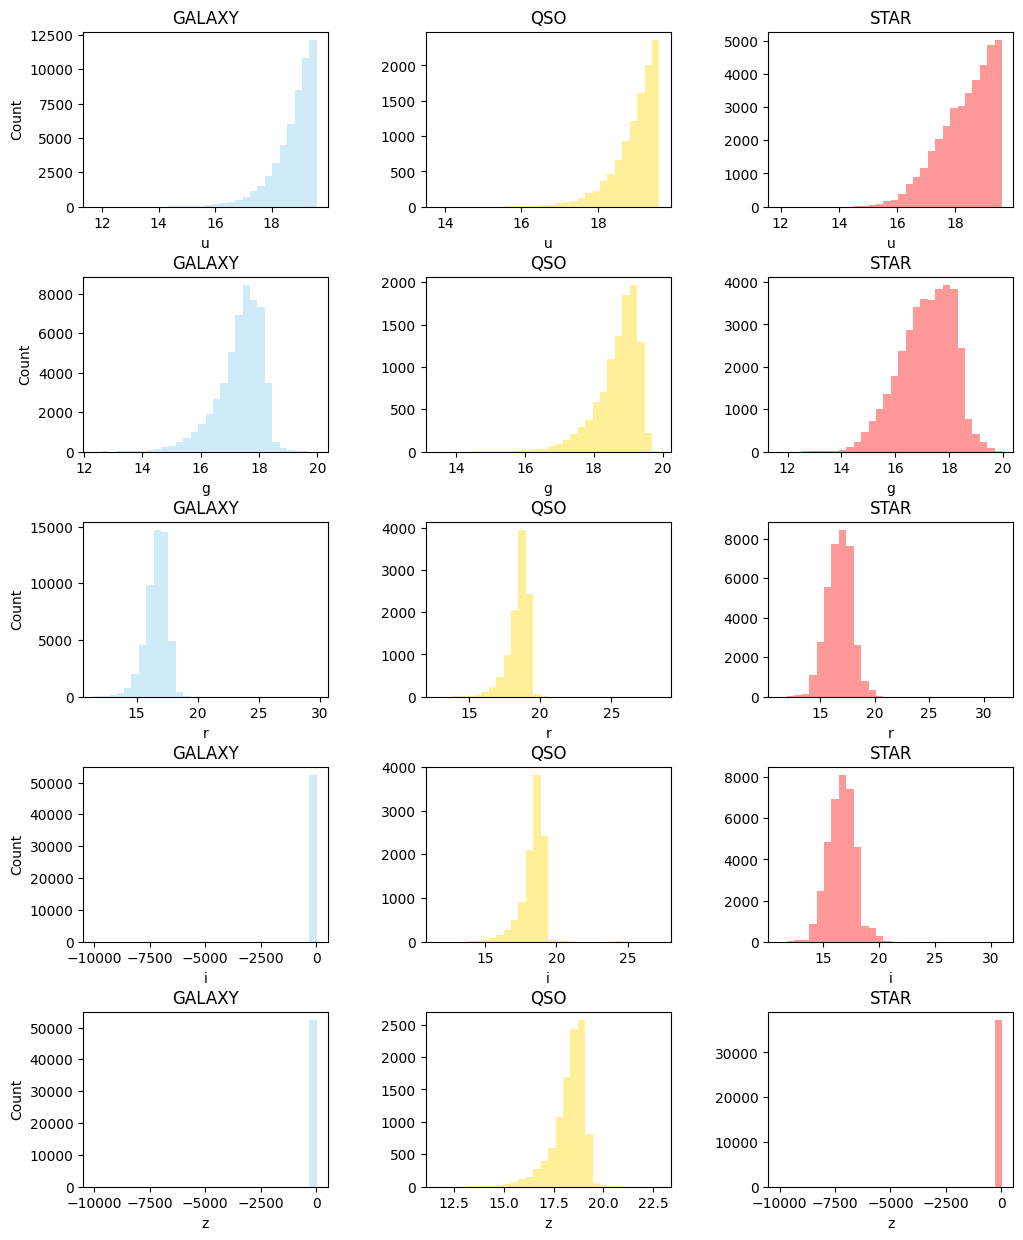

In [61]:
def pieChart(sdss_df):
    '''Plot a pie chart for label count.'''
    label_counts = sdss_df['class'].value_counts()
    colors = ['skyblue', 'red', 'gold']
    fig1, ax1 = plt.subplots()
    ax1.pie(label_counts, labels=['Galaxy', 'Stars', 'Quasars'],
            autopct='%1.2f%%', startangle=45, colors=colors)
    ax1.axis('equal')
    plt.title('SDSS Object Classes')
    plt.show()

def distribution(sdss_df, axes, feature, row):
    '''Plot the distribution of a space object w.r.t. a given feature.'''
    labels = np.unique(sdss_df['class'])
    colors = ['skyblue', 'gold', 'red']
    for i in range(len(labels)):
        label = labels[i]
        ax = sns.distplot(sdss_df.loc[sdss_df['class']==label, feature],
                          kde=False, bins=30, ax=axes[row, i], color=colors[i])
        ax.set_title(label)
        if (i == 0):
            ax.set(ylabel='Count')

def equitorial(sdss_df, row):
    '''Plot equitorial coordinates of observations.'''
    labels = np.unique(sdss_df['class'])
    colors = ['skyblue', 'gold', 'red']
    label = labels[row]
    sns.lmplot(x='ra', y='dec', data=sdss_df.loc[sdss_df['class']==label],
               hue='class', palette=[colors[row]], scatter_kws={'s': 2},
               fit_reg=False, height=4, aspect=2)
    plt.ylabel('dec')
    plt.title('Equitorial coordinates')

def main():
    # read in SDSS data
    filepath = 'C:\\Users\\HP\\Downloads\\SDSS_DR18.csv'
    sdss_df = pd.read_csv(filepath, encoding='utf-8')

    # define lists of relevant features
    geo = ['ra', 'dec']
    nonugriv = ['redshift', 'plate', 'mjd', 'fiberid']
    ugriv = ['u', 'g', 'r', 'i', 'z']

    # plot pie chart of label count
    pieChart(sdss_df)

    # plot equitorial coordinates of observations
    for row in range(3):
        equitorial(sdss_df, row)
    plt.show()

    # plot the distribution of non-geo and non-ugriv features
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 14))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    for row in range(len(nonugriv)):
        feat = nonugriv[row]
        distribution(sdss_df, axes, feat, row)
    plt.show()

    # plot the distribution of ugriv features
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
    plt.subplots_adjust(wspace=.4, hspace=.4)
    for row in range(len(ugriv)):
        feat = ugriv[row]
        distribution(sdss_df, axes, feat, row)
    plt.show()

main()


(100000, 43)
Number of rows: 100000
Number of columns: 43


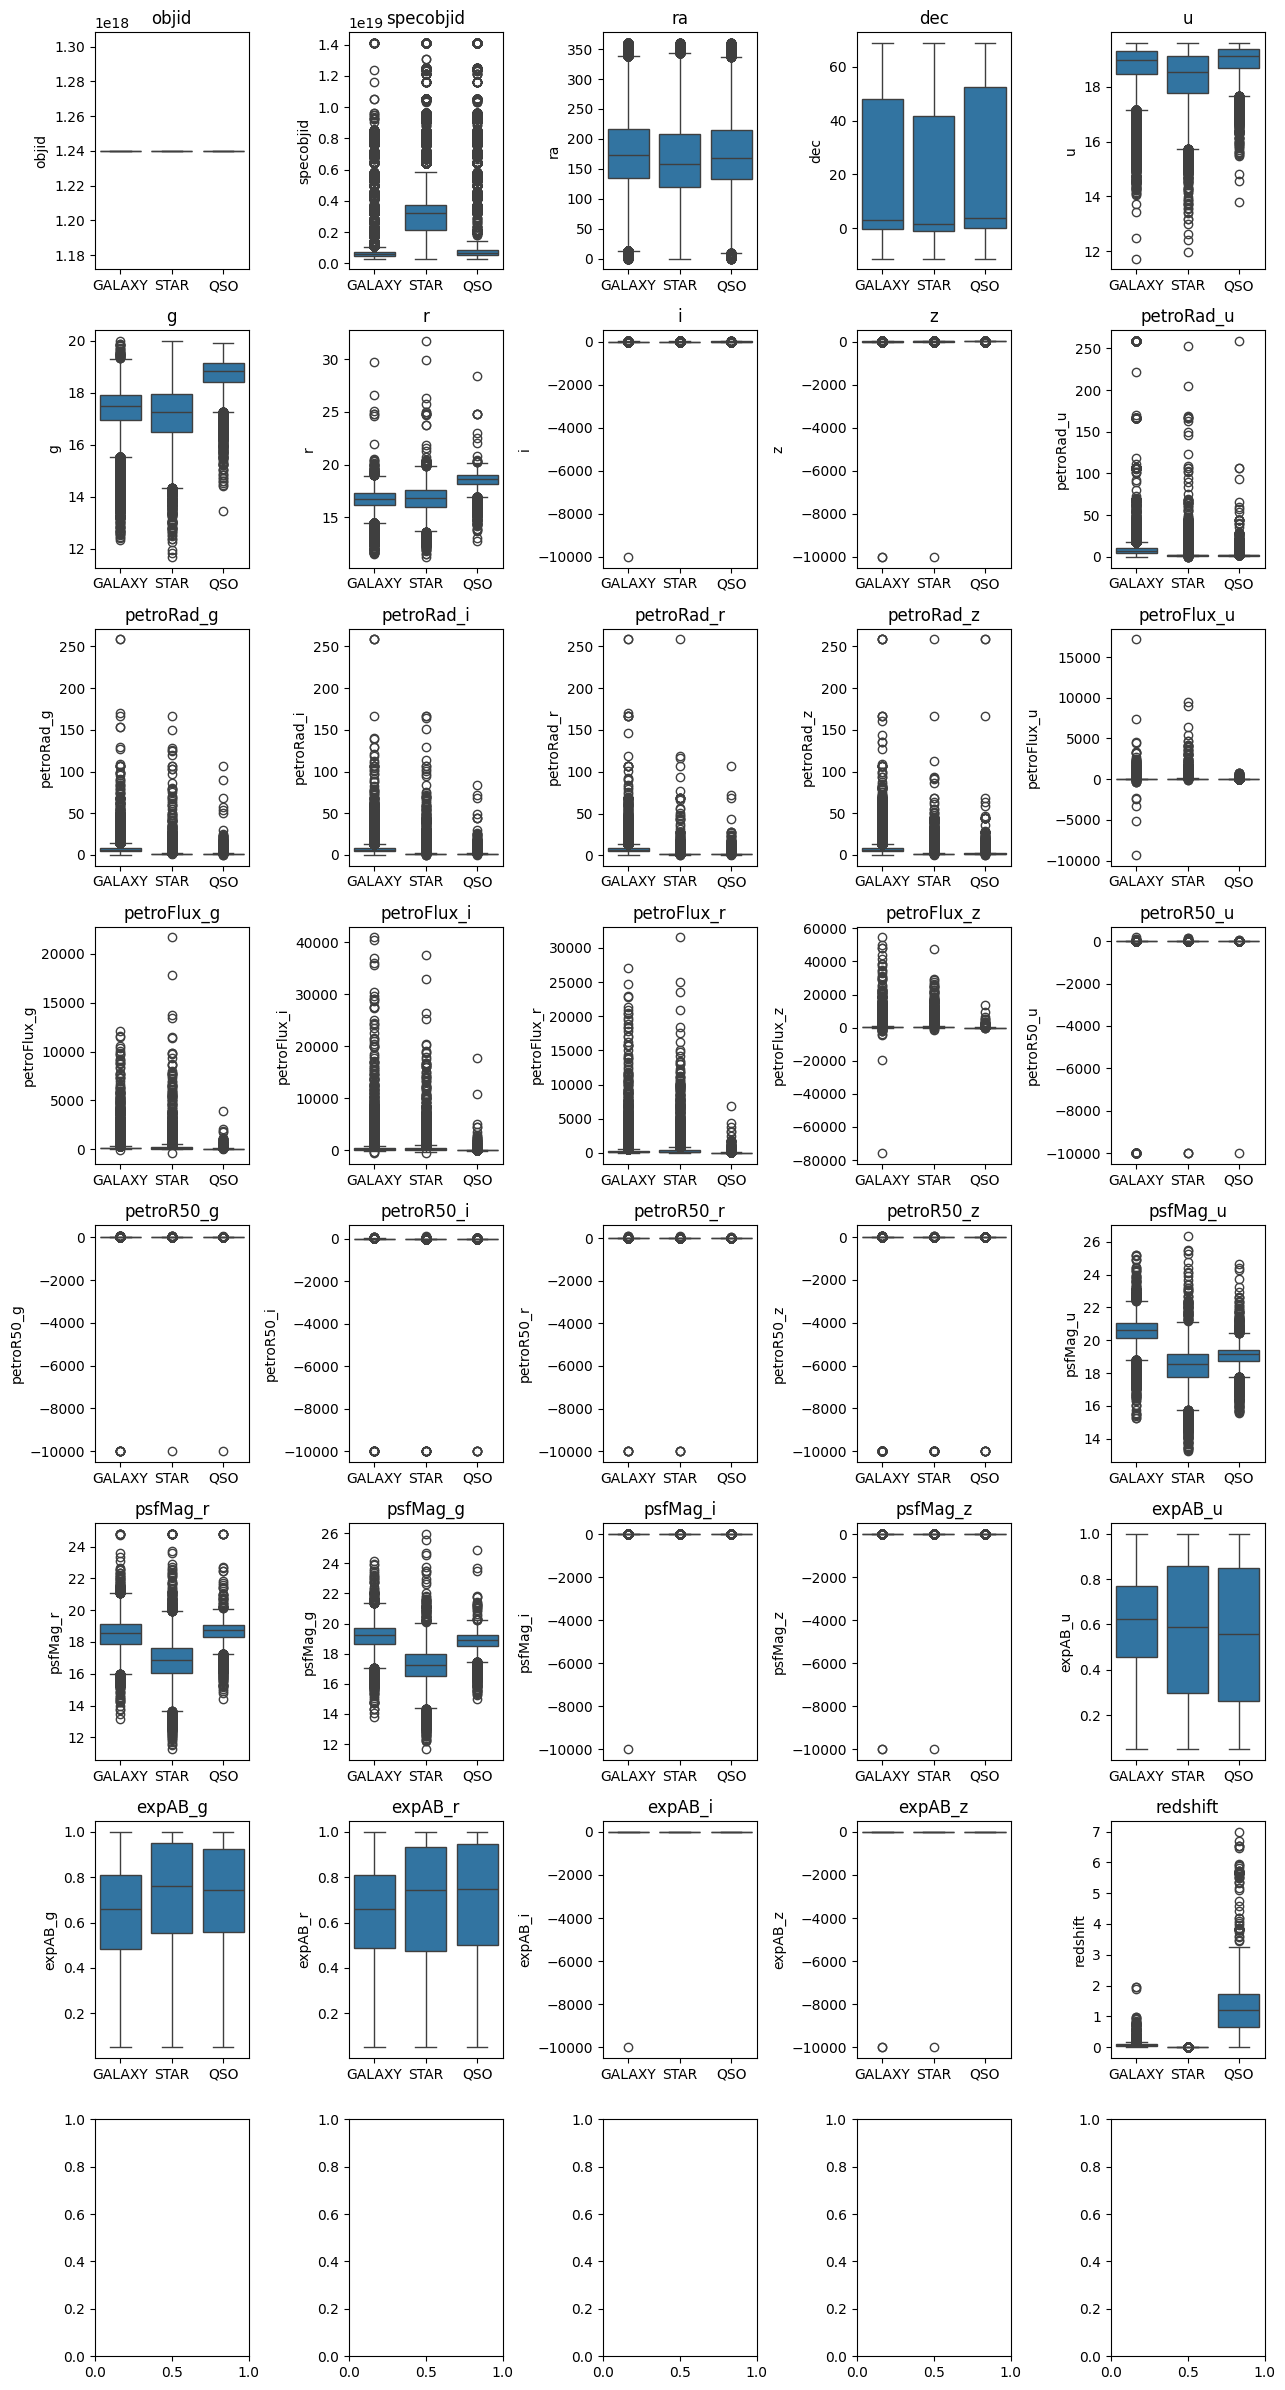

In [62]:
filepath = 'C:\\Users\\HP\\Downloads\\SDSS_DR18.csv'
data = pd.read_csv(filepath, encoding='utf-8')
Y = data['class']
print(data.shape)
print("Number of rows: "+str(data.shape[0]))
print("Number of columns: "+str(data.shape[1]))

data.head()

column_drop = ["run", "rerun", "camcol", "field", "plate", "mjd", "fiberid"]
# column_drop = ["run", "rerun", "camcol", "field", "plate", "mjd", "fiberid", 'i', 'z', 'petroRad_i','petroRad_z', 'petroFlux_i', 'petroFlux_z', 'petroR50_i','petroR50_z', 'psfMag_i', 'psfMag_z','expAB_i', 'expAB_z']

data = data.drop(column_drop, axis=1)

# print(data.describe().T)

# print(data.isnull().sum())

# print(data.duplicated().sum())

# print(data.columns.values)

# Assuming 'columns' is a list of column names and 'data' is your DataFrame
columns =  data.select_dtypes(include=[np.number]).columns.tolist()

num_columns = len(data.columns)
num_rows = math.ceil(num_columns / 5)

# Create a grid of subplots with a flexible number of rows
fig, axs = plt.subplots(num_rows, 5, figsize=(13, 3* num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    if i < num_columns:
        # Select the appropriate subplot
        ax = axs[i]

        # Create a boxplot in the selected subplot
        sns.boxplot(x=data['class'], y=data[column], ax=ax)
        ax.set_title(column)
        ax.set_ylabel(column)

        # Remove x-label for better layout
        ax.set_xlabel('')
    else:
        # Hide any excess subplots
        fig.delaxes(axs[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [63]:
x  =  data[columns]

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

x_train, x_test, y_train, y_test = train_test_split(x, Y, stratify=Y, test_size=0.2, random_state=1)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
X_scaled = scaler.transform(x)

print('Dataset:', X_scaled.shape)
print('Train set:', x_train_scaled.shape, y_train.shape)
print('Test set:', x_test_scaled.shape, y_test.shape)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Dataset: (100000, 35)
Train set: (80000, 35) (80000,)
Test set: (20000, 35) (20000,)
Train set: (80000, 35) (80000,)
Test set: (20000, 35) (20000,)


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
# lr1 = LogisticRegression().fit(x_train,y_train)
lr1 = DecisionTreeClassifier().fit(x_train,y_train)
# lr1 = RandomForestClassifier().fit(x_train,y_train)
# lr1

y_train_pred = lr1.predict(x_train)

In [67]:
accuracy_score(y_train_pred, y_train)

1.0

0.98605


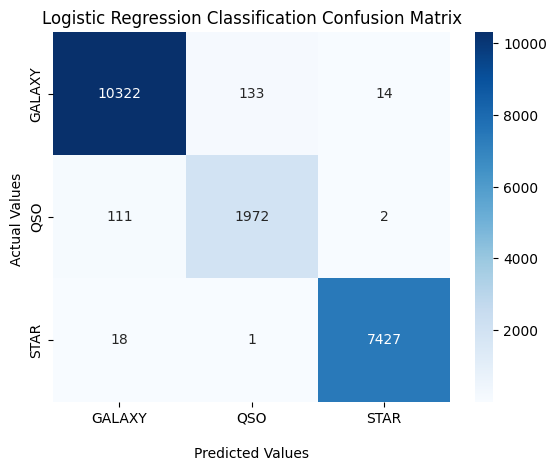

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


y_test_pred = lr1.predict(x_test)

# # Compute confusion matrix
# y_test[y_test=='STAR'] = 0
# y_test[y_test=='GALAXY'] = 1
# y_test[y_test=='QSO'] = 2

# y_test_pred[y_test_pred=='STAR'] = 0
# y_test_pred[y_test_pred=='GALAXY'] = 1
# y_test_pred[y_test_pred=='QSO'] = 2

cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)

ax = sns.heatmap(cnf_matrix,fmt='', cmap='Blues', annot=True)
ax.set_title('Logistic Regression Classification Confusion Matrix')
ax.xaxis.set_ticklabels(['GALAXY','QSO','STAR'])
ax.yaxis.set_ticklabels(['GALAXY','QSO','STAR'])
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

print(accuracy_score(y_test, y_test_pred))

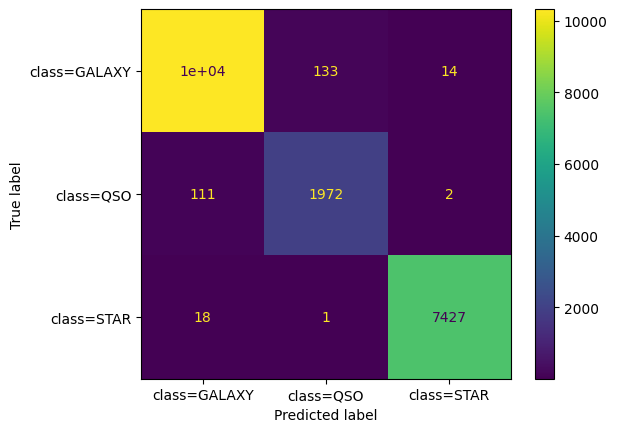

In [69]:
disp=ConfusionMatrixDisplay(cnf_matrix, display_labels=['class=GALAXY','class=QSO','class=STAR'])
disp.plot()
plt.show()

In [70]:
# #Further accuracy metrics:

# # Predict on the training data
# y_train_pred = rf2.predict(x_train_scaled)
# #yhat_train_prob = svm1.predict_proba(x_train)

# # Predict on the test data
# y_test_pred = rf2.predict(x_test_scaled)
# #yhat_test_prob = svm1.predict_proba(x_test)

# # Calculate metrics for training data
# accuracy_train = accuracy_score(y_train, y_train_pred)
# #log_loss_train = log_loss(y_train, yhat_train_prob)

# # Calculate metrics for test data
# accuracy_test = accuracy_score(y_test, y_test_pred)
# #log_loss_test = log_loss(y_test, yhat_test_prob)

# # Perform cross-validation on the test data and calculate mean accuracy
# cross_val_scores = cross_val_score(rf2, X_scaled, data['class'], cv=5, scoring='accuracy')
# cross_val_accuracy = np.mean(cross_val_scores)

# # Print the evaluation metrics
# print("Metrics on Training Data:")
# print("Accuracy (Train):", accuracy_train)
# print("Log Loss (Train):", '-')

# print("\nMetrics on Test Data:")
# print("Accuracy (Test):", accuracy_test)
# print("Log Loss (Test):",'-')

# print("\nCross-Validated Accuracy (Test):", cross_val_accuracy)

# new_row = {"Model":"Random Forest Classifier",
# "Model Alias":"rf2",
# "Detail":"Default, Scaled",
# "Accuracy (Train)": accuracy_train,
# "Log Loss (Train)": '-',
# "Accuracy (Test)": accuracy_test,
# "Log Loss (Test)": '-',
# "Cross-validated Accuracy (Test)": cross_val_accuracy}

# models_table = models_table.append(new_row, ignore_index=True)
# models_table

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import categorical_crossentropy, categorical_accuracy
import np_utils
import seaborn as sns
from tensorflow.keras.utils import to_categorical



In [79]:

# read in and shuffle SDSS data
filepath = 'C:\\Users\\HP\\Downloads\\SDSS_DR18.csv'
sdss_df = pd.read_csv(filepath, encoding='utf-8')
# drop physically insignificant columns
sdss_df = sdss_df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol',
'field'], axis=1)


# partition SDSS data (60% train, 20% validation, 20% test)
train_count = 40000
val_count = 30000
test_count = 30000

train_df = sdss_df.iloc[:train_count]
validation_df = sdss_df.iloc[train_count:train_count+val_count]
test_df = sdss_df.iloc[-test_count:]


# obtain feature dataframes
X_train = train_df.drop(['class'], axis=1)
X_validation = validation_df.drop(['class'], axis=1)
X_test = test_df.drop(['class'], axis=1)

# one-hot encode labels for DNN
le = LabelEncoder()
le.fit(sdss_df['class'])
encoded_Y = le.transform(sdss_df['class'])
onehot_labels = to_categorical(encoded_Y)

y_train = onehot_labels[:train_count]
y_validation = onehot_labels[train_count:train_count+val_count]
y_test = onehot_labels[-test_count:]

# scale features
scaler = StandardScaler()
scaler.fit(X_train) # fit scaler to training data only
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_validation = pd.DataFrame(scaler.transform(X_validation), columns=X_validation.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_validation.columns)

# apply principal component analysis to wavelength intensities
pca = PCA(n_components=3)
dfs = [X_train, X_validation, X_test]
for i in range(len(dfs)):
    df = dfs[i]
ugriz = pca.fit_transform(df[['u', 'g', 'r', 'i', 'z']])
df = pd.concat((df, pd.DataFrame(ugriz)), axis=1)
df.rename({0: 'PCA1', 1: 'PCA2', 2: 'PCA3'}, axis=1, inplace=True)
df.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
dfs[i] = df
X_train, X_validation, X_test = dfs

# create a deep neural network model
num_features = X_train.shape[1]
dnn = Sequential()
dnn.add(Dense(9, input_dim=num_features, activation='relu'))
dnn.add(Dropout(0.1))
dnn.add(Dense(9, activation='relu'))
dnn.add(Dropout(0.1))
dnn.add(Dense(9, activation='relu'))
dnn.add(Dropout(0.05))
dnn.add(Dense(6, activation='relu'))
dnn.add(Dropout(0.05))
dnn.add(Dense(6, activation='relu'))
dnn.add(Dense(6, activation='relu'))
dnn.add(Dense(3, activation='softmax', name='output'))

dnn.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['categorical_accuracy'])

# train DNN
my_epochs = 20
history = dnn.fit(X_train, y_train, epochs=my_epochs, batch_size=20,
validation_data=(X_validation, y_validation))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - categorical_accuracy: 0.8333 - loss: 0.4544 - val_categorical_accuracy: 0.9791 - val_loss: 0.9672
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.9705 - loss: 0.1221 - val_categorical_accuracy: 0.9840 - val_loss: 0.6321
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9747 - loss: 0.0972 - val_categorical_accuracy: 0.9861 - val_loss: 0.3613
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9791 - loss: 0.0863 - val_categorical_accuracy: 0.9871 - val_loss: 0.2869
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9819 - loss: 0.0824 - val_categorical_accuracy: 0.9875 - val_loss: 0.2287
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.9815 - loss: 0.0793 - val_categorical_accuracy: 0.9878 - val_loss: 0.1621
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accurac

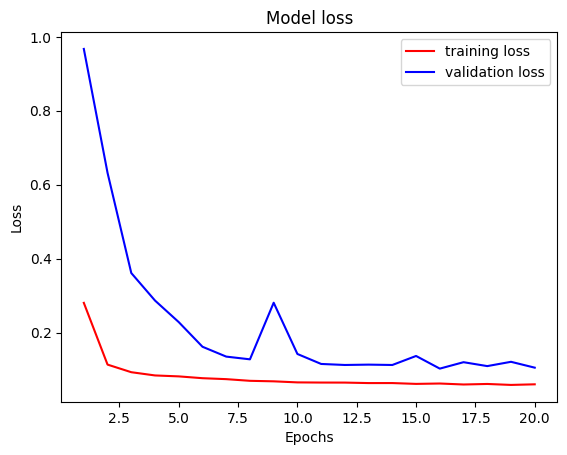

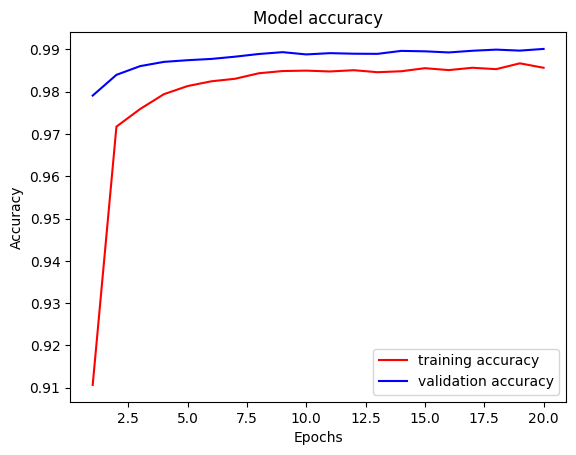

In [83]:
# plot model loss while training
epochs_arr = np.arange(1, my_epochs + 1, 1)
my_history = history.history
line1 = plt.plot(epochs_arr, my_history['loss'], 'r-', label='training loss')
line2 = plt.plot(epochs_arr, my_history['val_loss'], 'b-', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()
plt.show()

# plot model accuracy while training
line1 = plt.plot(epochs_arr, my_history['categorical_accuracy'], 'r-', label='training accuracy')
line2 = plt.plot(epochs_arr, my_history['val_categorical_accuracy'], 'b-', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()
